ML_8 (читаем комментарии в коде!)

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('diabetes.csv')
task_data = df.head(680)# сюда пишем, сколько строк нужно взять
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
len(task_data[task_data['Outcome'] == 0])# сюда вместо нуля пишем номер класса и получаем ответ на первый вопрос

446

In [3]:
train = task_data.head(int(len(task_data)*0.8))
test = task_data.tail(int(len(task_data)*0.2))

In [4]:
features = list(train.columns[:8])
x = train[features]
y = train['Outcome']

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', #критерий разделения
                              min_samples_leaf=15, #минимальное число объектов в листе
                              max_leaf_nodes=25, #максимальное число листьев
                              random_state=2020)
clf=tree.fit(x, y)


In [ ]:
from sklearn.tree import export_graphviz
import graphviz
columns = list(x.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

clf.tree_.max_depth #глубина дерева

8

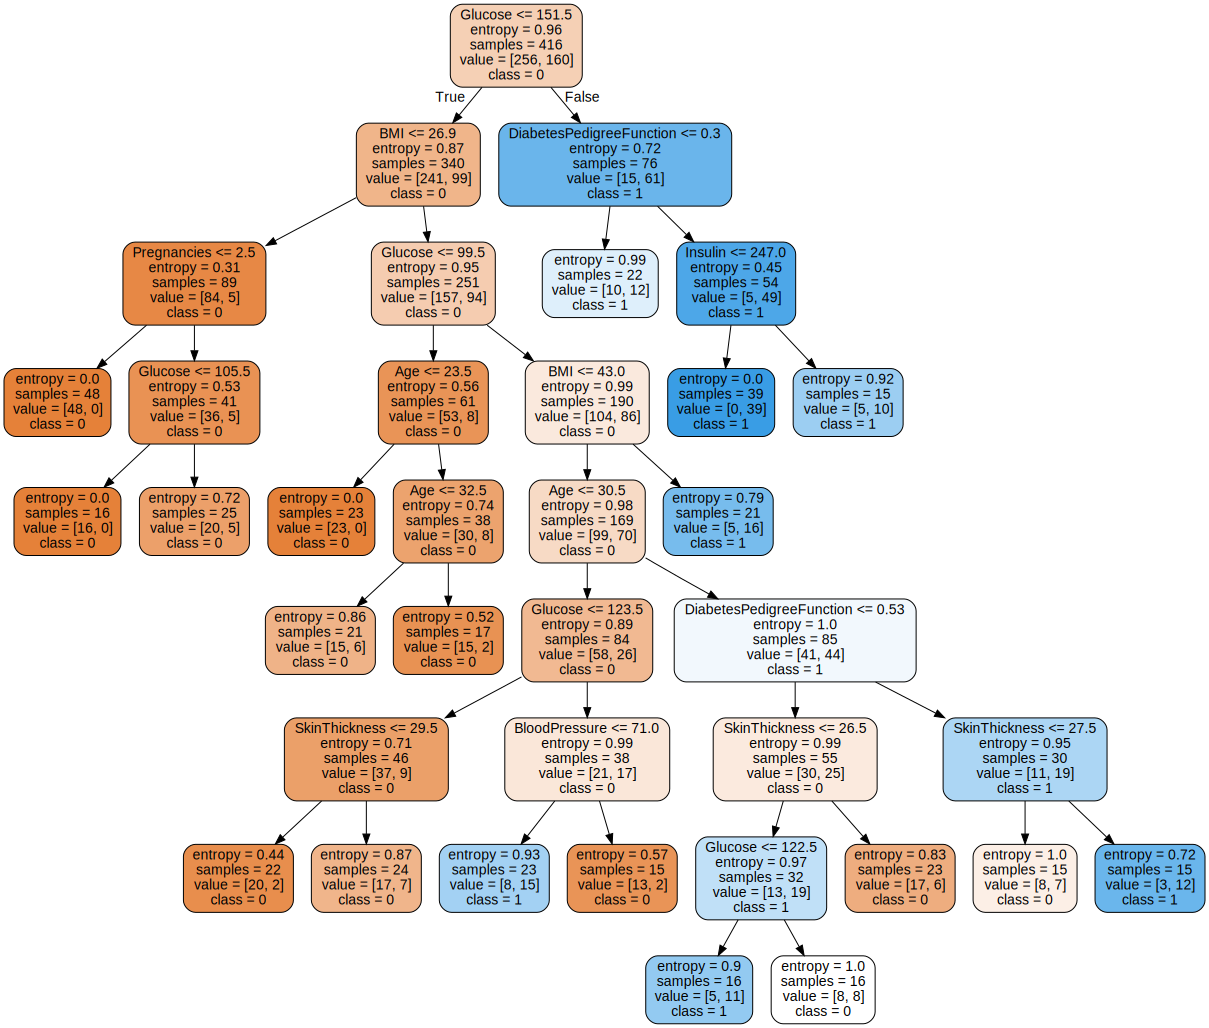

In [ ]:
graphviz.Source(dot_graph) #ищем последние уровни и берем любое название критерия из этого уровня (BMI, Glucose, Age, Pregnancies, DiabetesPedigreeFunction)
# значение разделения - число после <=

In [ ]:
features = list(test.columns[:8])
x = test[features]
y_true = test['Outcome']
y_pred = clf.predict(x)
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred) #доля правильных ответов

0.8173076923076923

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro') #F1

0.759464394400487

In [ ]:
clf.predict([df.loc[734, features].tolist()])[0]# вместо 734 пишем номер нужной строки и получаем ответ

0